# Context

This dataset contains web traffic records collected through AWS CloudWatch, aimed at detecting suspicious activities and potential attack attempts.
The data were generated by monitoring traffic to a production web server, using various detection rules to identify anomalous patterns.

# Problem Statement

**The goal is to leverage this dataset to enhance threat detection techniques in cloud environments. Potential uses include anomaly detection, classification models to differentiate between normal and suspicious traffic, and conducting security analyses to understand attack tactics and techniques.**

# About Dataset

bytes_in: Bytes received by the server.

bytes_out: Bytes sent from the server.

creation_time: Timestamp of when the record was created.

end_time: Timestamp of when the connection ended.

src_ip: Source IP address.

src_ip_country_code: Country code of the source IP.

protocol: Protocol used in the connection.

response.code: HTTP response code.

dst_port: Destination port on the server.

dst_ip: Destination IP address.

rule_names: Name of the rule that identified the traffic as suspicious.

observation_name: Observations associated with the traffic.

source.meta: Metadata related to the source.

source.name: Name of the traffic source.

time: Timestamp of the detected event.

detection_types: Type of detection applied.

# Importing Libraries 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Set use_inf_as_na option
#pd.options.mode.use_inf_as_na = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cybersecurity-suspicious-web-threat-interactions/CloudWatch_Traffic_Web_Attack.csv


# Importing Dataset

In [2]:
d = pd.read_csv('/kaggle/input/cybersecurity-suspicious-web-threat-interactions/CloudWatch_Traffic_Web_Attack.csv')
d.head(10)

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
5,3906,3488,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
6,17748,29208,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
7,4767917,291520,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
8,10538,15514,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
9,9656,6380,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.131.1,AT,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


# Data Preprocessing

In [3]:
d.shape

(282, 16)

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [5]:
d.describe()

,bytes_in,bytes_out,response.code,dst_port
count,2.820000e+02,2.820000e+02,282.0,282.0
mean,1.199390e+06,8.455429e+04,200.0,443.0
std,4.149312e+06,2.549279e+05,0.0,0.0
min,4.000000e+01,4.400000e+01,200.0,443.0
25%,5.381500e+03,1.114200e+04,200.0,443.0
50%,1.318200e+04,1.379950e+04,200.0,443.0
75%,3.083300e+04,2.627950e+04,200.0,443.0
max,2.520779e+07,1.561220e+06,200.0,443.0


## Checking Missing values

In [6]:
d.isnull().sum()

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

**No Null Value Found**

## Checking For Duplicates

In [7]:
# Mark all duplicate rows as True
duplicate_rows = d.duplicated(keep=False)

# Filter the DataFrame to show duplicate rows
duplicates = d[duplicate_rows]

# Display the duplicate rows
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [bytes_in, bytes_out, creation_time, end_time, src_ip, src_ip_country_code, protocol, response.code, dst_port, dst_ip, rule_names, observation_name, source.meta, source.name, time, detection_types]
Index: []


**no duplicates found**

# EDA

### categorical and numerical features in the dataset

In [8]:
# Initialize lists to store categorical and numerical column names
categorical_cols = []
numerical_cols = []

# Iterate through each column in the DataFrame
for col in d.columns:
    # Check if the column dtype is object (indicating categorical data)
    if d[col].dtype == 'object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

# Print the lists of categorical and numerical column names
print("Categorical Columns:")
print(categorical_cols)
print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
['creation_time', 'end_time', 'src_ip', 'src_ip_country_code', 'protocol', 'dst_ip', 'rule_names', 'observation_name', 'source.meta', 'source.name', 'time', 'detection_types']

Numerical Columns:
['bytes_in', 'bytes_out', 'response.code', 'dst_port']


### Unique Values of all Categorical Column

In [9]:
# Apply value_counts() to each categorical feature
for feature in categorical_cols:
    print(f"Unique values for {feature}:")
    print(d[feature].value_counts())
    print("\n")

Unique values for creation_time:
creation_time
2024-04-26T09:00:00Z    17
2024-04-26T08:50:00Z    13
2024-04-26T09:50:00Z    11
2024-04-25T23:20:00Z    11
2024-04-26T09:40:00Z    11
2024-04-25T23:10:00Z    11
2024-04-26T00:40:00Z    10
2024-04-26T08:20:00Z    10
2024-04-26T01:20:00Z    10
2024-04-26T01:00:00Z    10
2024-04-25T23:00:00Z    10
2024-04-26T01:30:00Z    10
2024-04-26T00:10:00Z    10
2024-04-25T23:50:00Z     9
2024-04-26T01:10:00Z     9
2024-04-26T01:40:00Z     9
2024-04-26T09:30:00Z     9
2024-04-25T23:40:00Z     9
2024-04-26T00:30:00Z     9
2024-04-26T09:10:00Z     9
2024-04-25T23:30:00Z     8
2024-04-26T09:20:00Z     8
2024-04-26T00:00:00Z     8
2024-04-26T08:30:00Z     8
2024-04-26T01:50:00Z     8
2024-04-26T00:20:00Z     8
2024-04-26T08:40:00Z     7
2024-04-26T08:10:00Z     7
2024-04-26T08:00:00Z     7
2024-04-26T00:50:00Z     6
Name: count, dtype: int64


Unique values for end_time:
end_time
2024-04-26T09:10:00Z    17
2024-04-26T09:00:00Z    13
2024-04-26T10:00:00Z    

## Distribution of Bytes In and Bytes Out

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


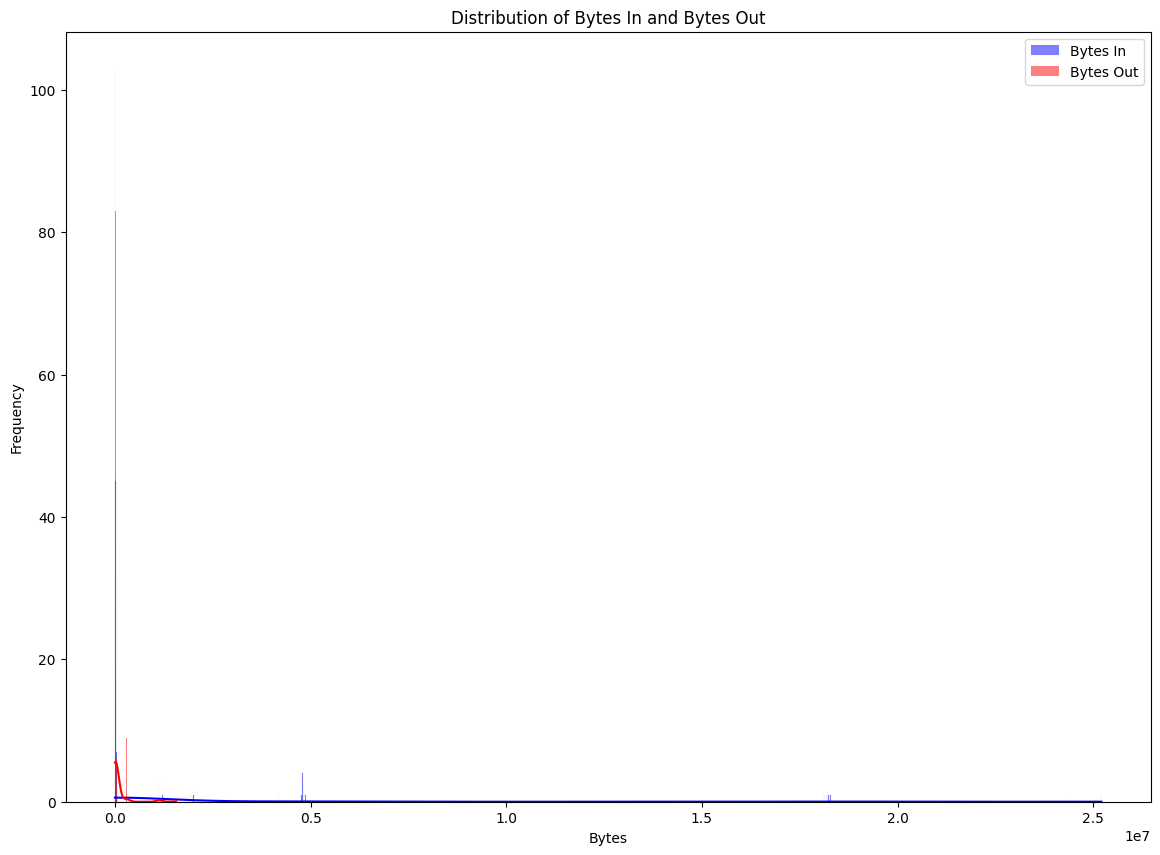

In [10]:
# Visualize bytes_in and bytes_out distribution
plt.figure(figsize=(14, 10))
sns.histplot(d['bytes_in'], kde=True, color='blue', label='Bytes In')
sns.histplot(d['bytes_out'], kde=True, color='red', label='Bytes Out')
plt.xlabel('Bytes')
plt.ylabel('Frequency')
plt.title('Distribution of Bytes In and Bytes Out')
plt.legend()
plt.show()

## Bytes In vs Bytes Out

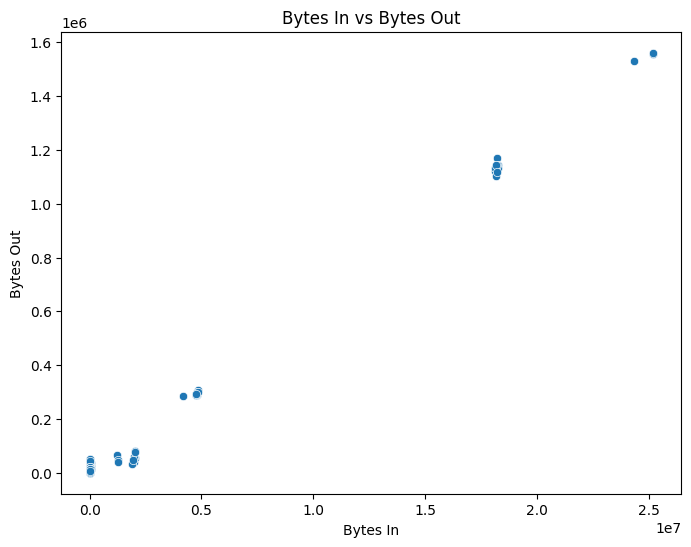

In [11]:
# Visualize bytes_in vs bytes_out
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bytes_in', y='bytes_out', data=d)
plt.xlabel('Bytes In')
plt.ylabel('Bytes Out')
plt.title('Bytes In vs Bytes Out')
plt.show()

## Bytes In and Bytes Out over Time

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

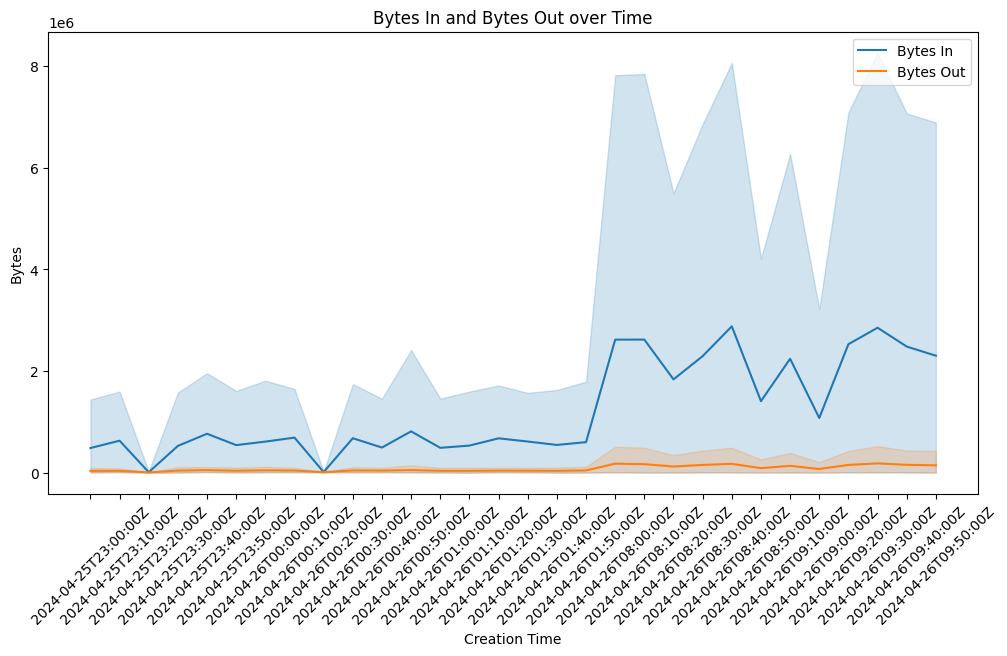

In [12]:
# Visualize bytes_in and bytes_out over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='creation_time', y='bytes_in', data=d, label='Bytes In')
sns.lineplot(x='creation_time', y='bytes_out', data=d, label='Bytes Out')
plt.xlabel('Creation Time')
plt.ylabel('Bytes')
plt.title('Bytes In and Bytes Out over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Count of Suspicious Web Interactions by Top Source IP Countries

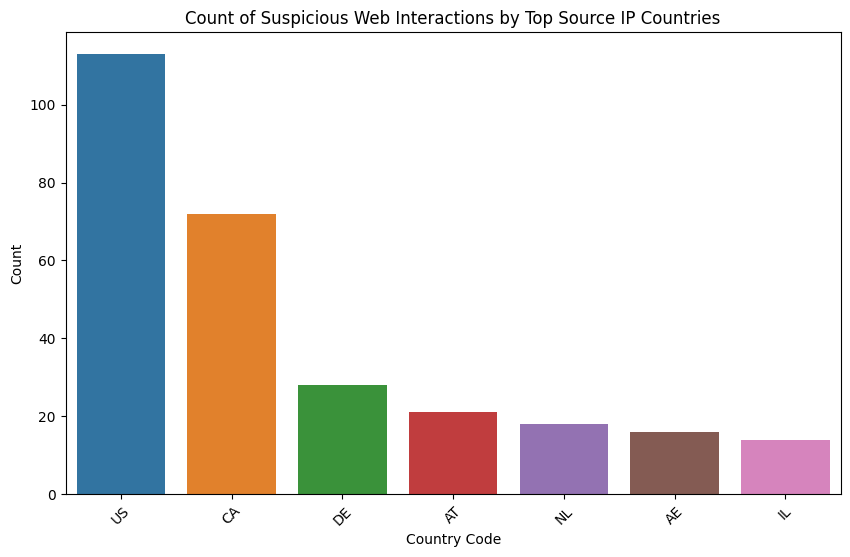

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x=d['src_ip_country_code'], data=d, order=d['src_ip_country_code'].value_counts().iloc[:10].index)
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.title('Count of Suspicious Web Interactions by Top Source IP Countries')
plt.xticks(rotation=45)
plt.show()

## Distribution of Bytes In for Top Source IP Addresses

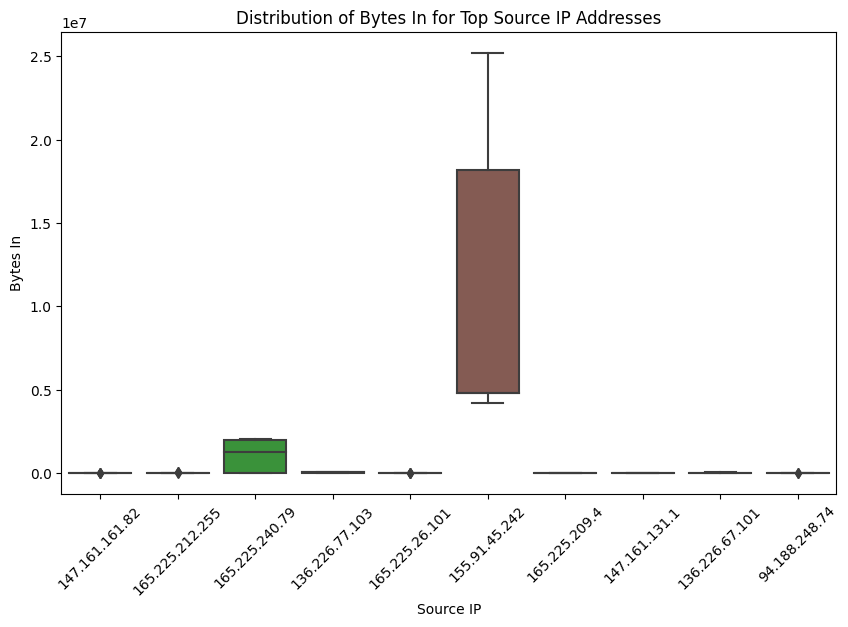

In [14]:
# Source IP analysis
top_src_ips = d['src_ip'].value_counts().head(10).index
top_src_ips_data = d[d['src_ip'].isin(top_src_ips)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='src_ip', y='bytes_in', data=top_src_ips_data)
plt.xlabel('Source IP')
plt.ylabel('Bytes In')
plt.title('Distribution of Bytes In for Top Source IP Addresses')
plt.xticks(rotation=45)
plt.show()

## Distribution of Bytes OUT for Top Source IP Addresses

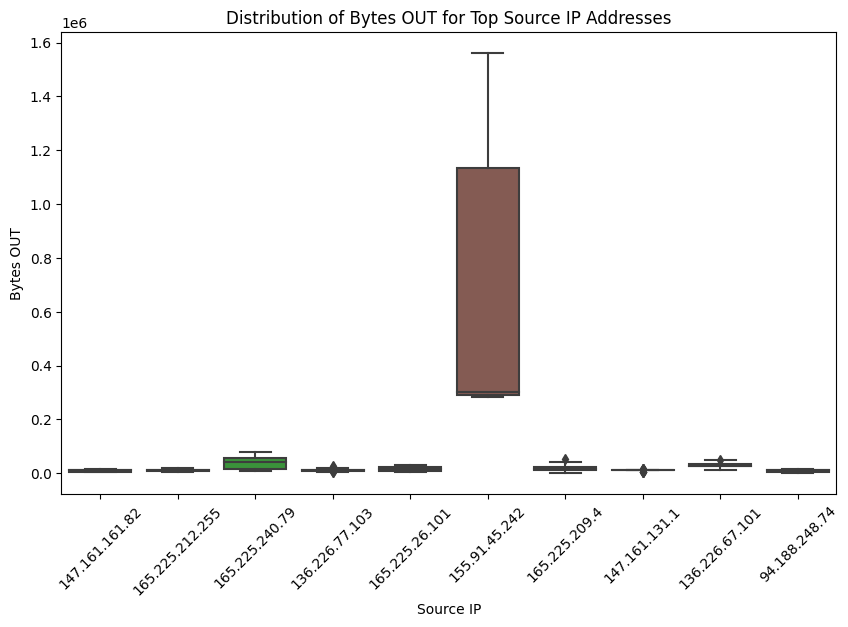

In [15]:
# Source IP analysis
top_src_ips = d['src_ip'].value_counts().head(10).index
top_src_ips_data = d[d['src_ip'].isin(top_src_ips)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='src_ip', y='bytes_out', data=top_src_ips_data)
plt.xlabel('Source IP')
plt.ylabel('Bytes OUT')
plt.title('Distribution of Bytes OUT for Top Source IP Addresses')
plt.xticks(rotation=45)
plt.show()

## Distribution of Bytes In for Top Destination Ports

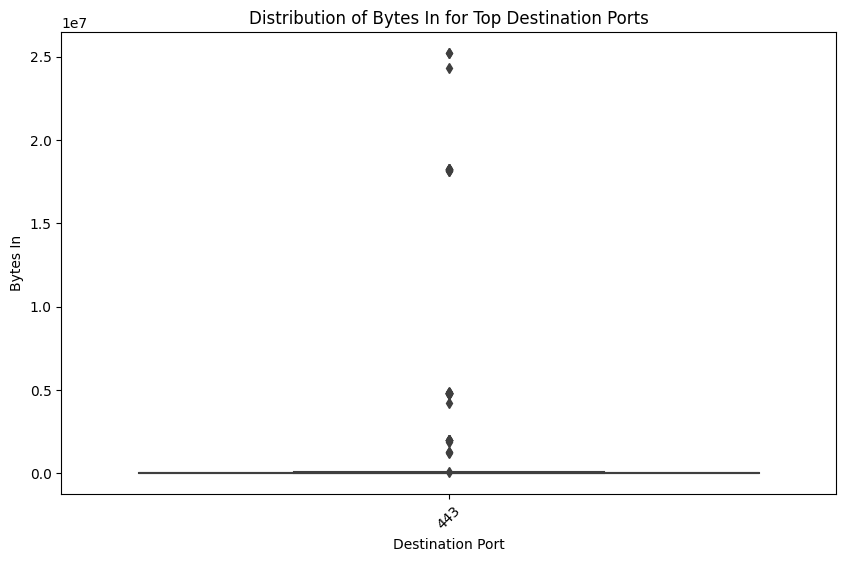

In [16]:
# Destination port analysis
top_dst_ports = d['dst_port'].value_counts().head(10).index
top_dst_ports_data = d[d['dst_port'].isin(top_dst_ports)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='dst_port', y='bytes_in', data=top_dst_ports_data)
plt.xlabel('Destination Port')
plt.ylabel('Bytes In')
plt.title('Distribution of Bytes In for Top Destination Ports')
plt.xticks(rotation=45)
plt.show()

## Distribution of Bytes OUT for Top Destination Ports

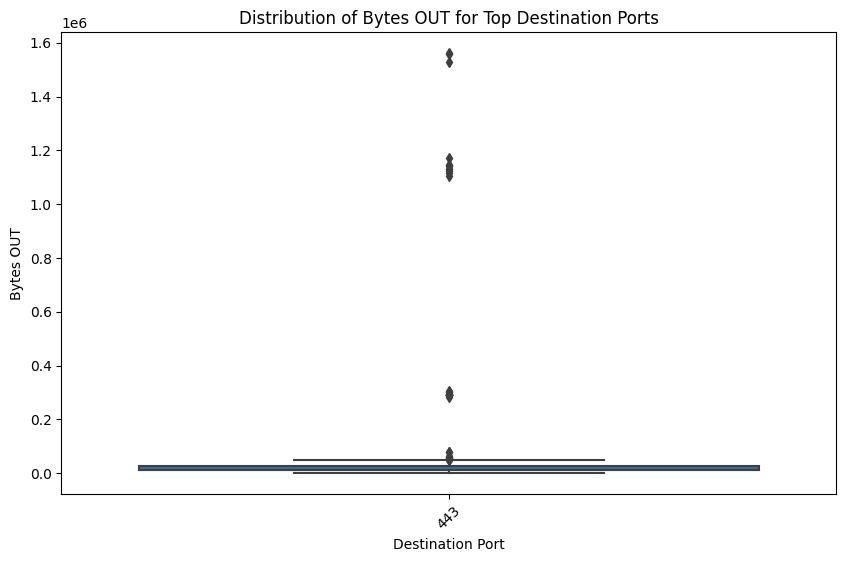

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='dst_port', y='bytes_out', data=top_dst_ports_data)
plt.xlabel('Destination Port')
plt.ylabel('Bytes OUT')
plt.title('Distribution of Bytes OUT for Top Destination Ports')
plt.xticks(rotation=45)
plt.show()

## Count of Suspicious Web Interactions over Time

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


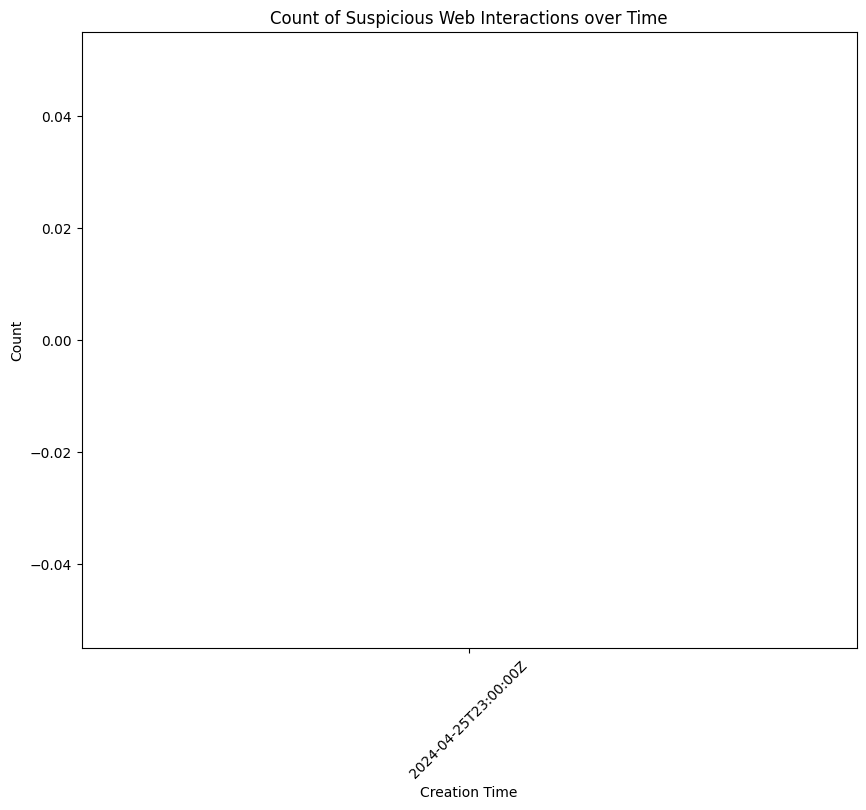

In [18]:
plt.figure(figsize=(10, 8))
sns.lineplot(x=d['creation_time'], y=d.groupby('creation_time').size(), color='green')
plt.xlabel('Creation Time')
plt.ylabel('Count')
plt.title('Count of Suspicious Web Interactions over Time')
plt.xticks(rotation=45)
plt.show()

## Distribution of Bytes In for Each HTTP Response Code

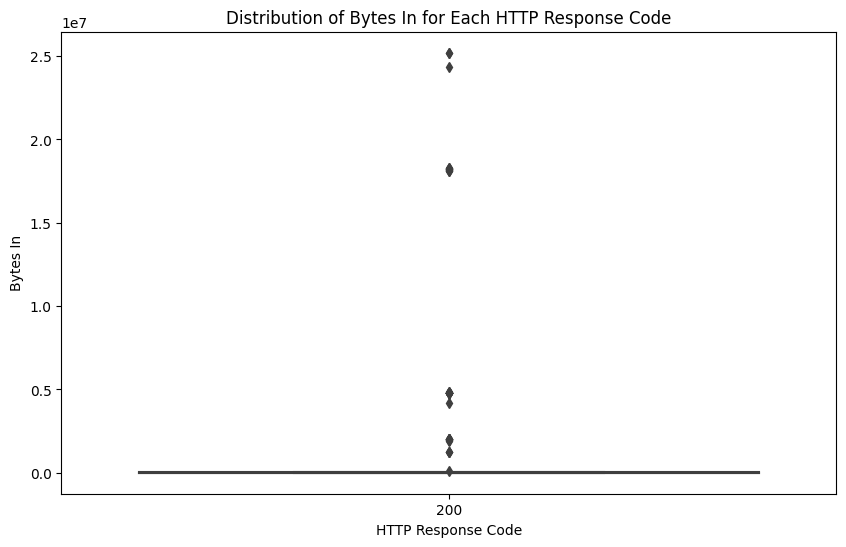

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='response.code', y='bytes_in', data=d)
plt.xlabel('HTTP Response Code')
plt.ylabel('Bytes In')
plt.title('Distribution of Bytes In for Each HTTP Response Code')
plt.show()

## Distribution of Bytes In by Detection Type

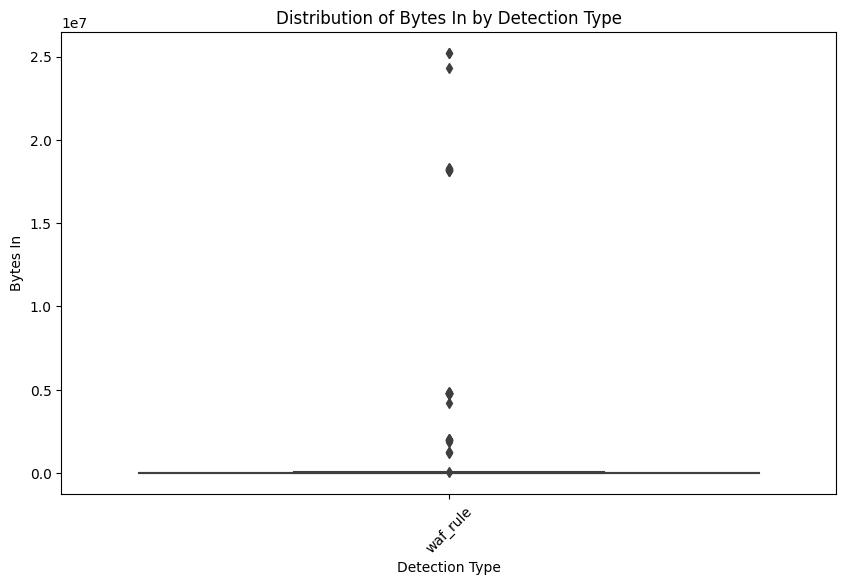

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='detection_types', y='bytes_in', data=d)
plt.xlabel('Detection Type')
plt.ylabel('Bytes In')
plt.title('Distribution of Bytes In by Detection Type')
plt.xticks(rotation=45)
plt.show()

## Distribution of Bytes In by Traffic Source

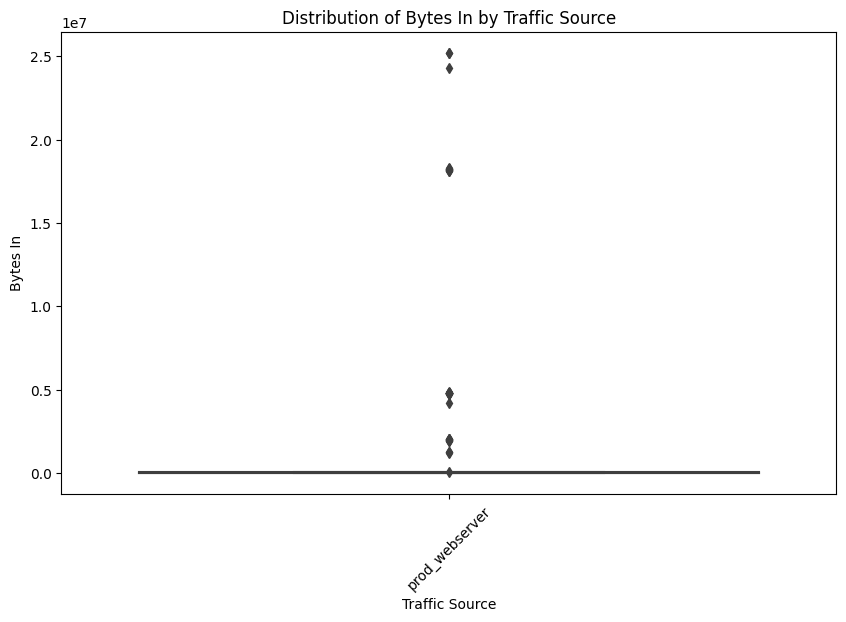

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='source.name', y='bytes_in', data=d)
plt.xlabel('Traffic Source')
plt.ylabel('Bytes In')
plt.title('Distribution of Bytes In by Traffic Source')
plt.xticks(rotation=45)
plt.show()

## Bytes In Over Time by Detection Type

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


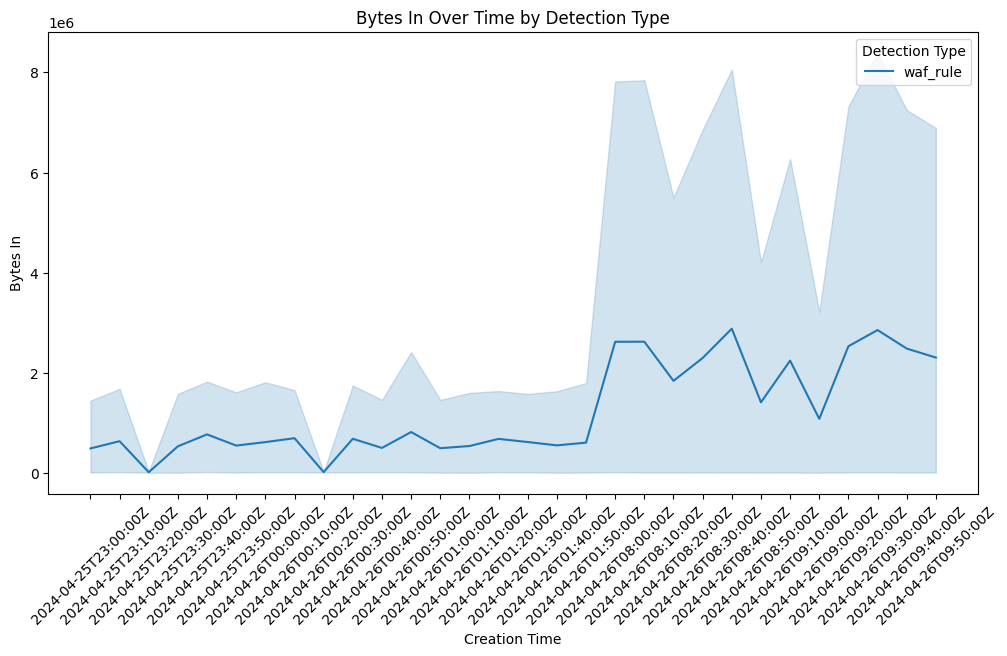

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='creation_time', y='bytes_in', hue='detection_types', data=d)
plt.xlabel('Creation Time')
plt.ylabel('Bytes In')
plt.title('Bytes In Over Time by Detection Type')
plt.xticks(rotation=45)
plt.legend(title='Detection Type')
plt.show()

## Bytes OUT Over Time by Detection Type

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


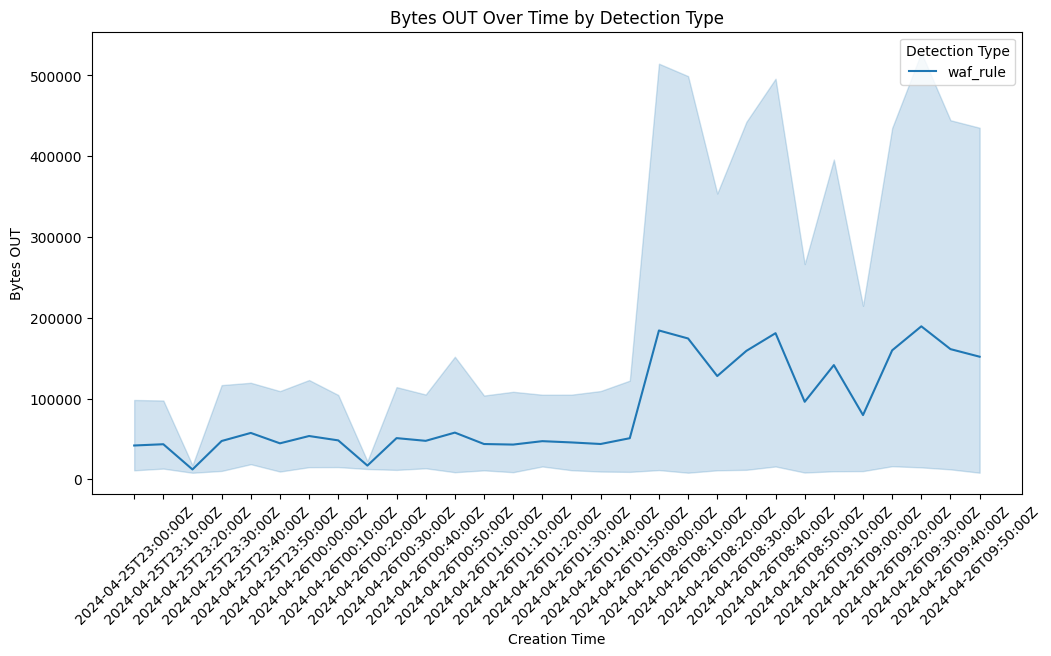

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='creation_time', y='bytes_out', hue='detection_types', data=d)
plt.xlabel('Creation Time')
plt.ylabel('Bytes OUT')
plt.title('Bytes OUT Over Time by Detection Type')
plt.xticks(rotation=45)
plt.legend(title='Detection Type')
plt.show()

# Data Insights and Findings

**1. Distribution of Bytes over Detection Type:**
The distribution of bytes transferred (both in and out) varied across Detection Type. We observed that both byte in and byte out detected using waf_rule.

**2. Relationship between Bytes In and Bytes Out:**
There appears to be a positive correlation between bytes in and bytes out. This suggests that higher bytes in generally correspond to higher bytes out, indicating bidirectional communication between the server and clients.

**4. Trend Analysis Over Time:**
Analysis of bytes transferred over time revealed interesting trends. For example, we observed spikes in byte transfer at specific time intervals, suggesting potential periods of increased malicious activity.

**5. Source IP and Destination Port Analysis:**
Investigation into source IP addresses and destination ports revealed insights into the distribution of bytes transferred from different origins and to different destinations. Certain source IPs are from country code US followed by CA and destination port exhibited higher byte transfer at 443.

**6. Further Analysis Suggestions:**
While our analysis provided valuable insights into suspicious web interactions and patterns of byte transfer, there are opportunities for further exploration. Future analysis could include deep dives into specific detection types or investigation of anomalous behaviors in web traffic.

# This notebook is in progess, I will keep updating it. In case, you find it helpful, leave a upvote or comment for suggestions.¶
# Thankyou!